In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from CGAN import *
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import load_model, Model
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from matplotlib import pyplot
 

Using TensorFlow backend.


In [3]:
cgan = CGAN()

1000 [D loss: 0.001106, acc.: 100.00%] [G loss: 0.061213]


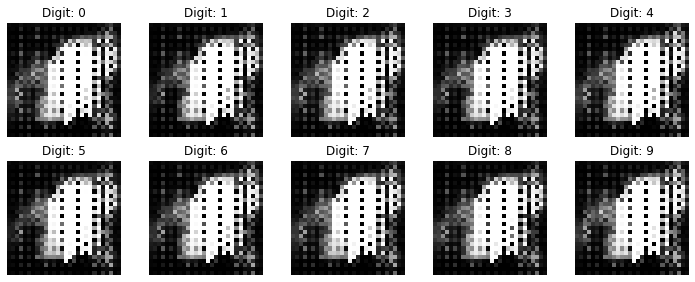

2000 [D loss: 0.000956, acc.: 100.00%] [G loss: 4.721780]


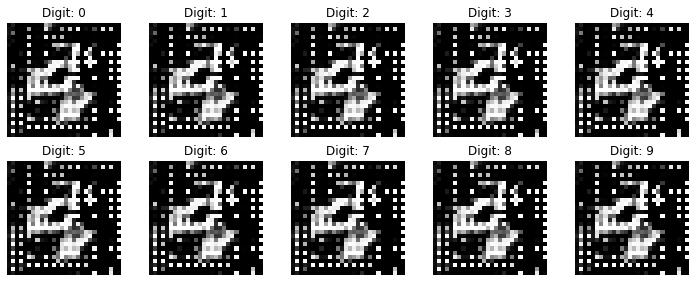

3000 [D loss: 0.000401, acc.: 100.00%] [G loss: 8.788090]


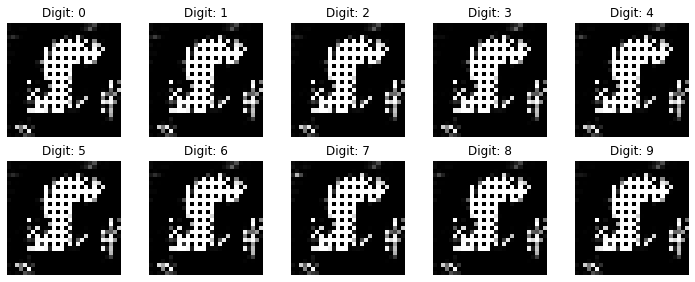

4000 [D loss: 0.000306, acc.: 100.00%] [G loss: 8.042978]


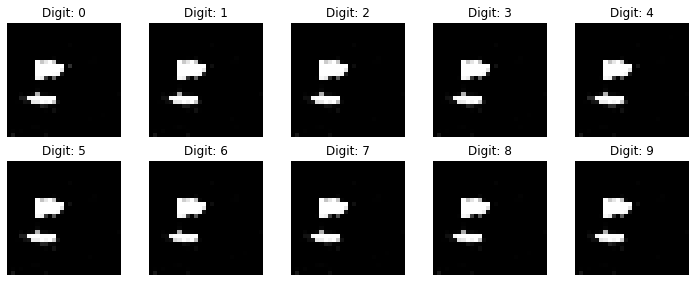

5000 [D loss: 0.000395, acc.: 100.00%] [G loss: 6.651423]


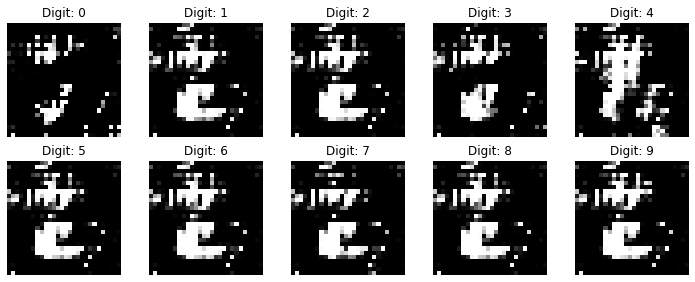

6000 [D loss: 0.002502, acc.: 100.00%] [G loss: 7.457467]


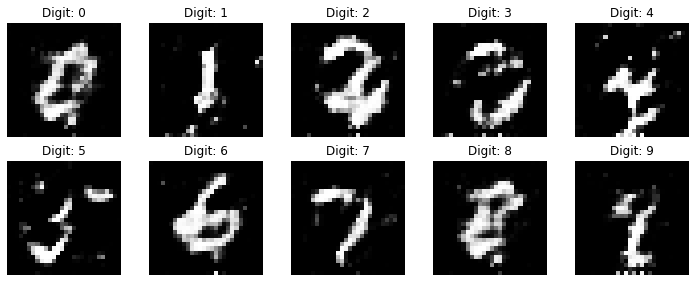

7000 [D loss: 0.041207, acc.: 100.00%] [G loss: 14.676365]


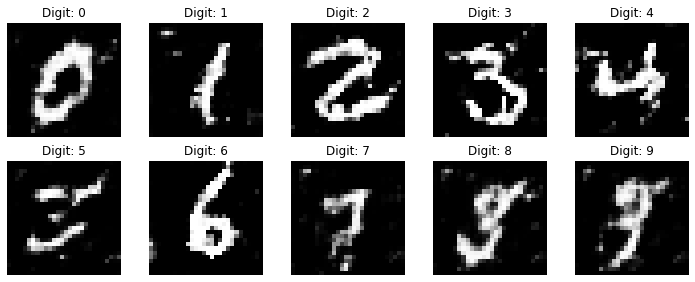

8000 [D loss: 0.101851, acc.: 96.88%] [G loss: 10.868607]


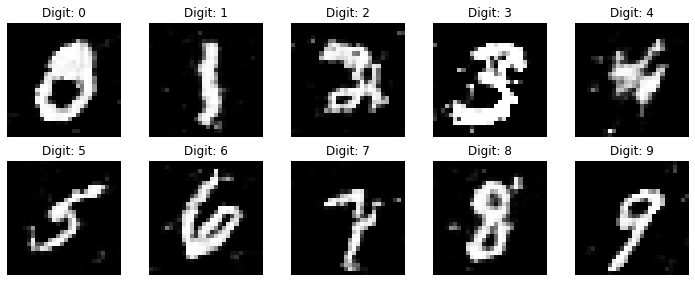

9000 [D loss: 0.004891, acc.: 100.00%] [G loss: 8.566021]


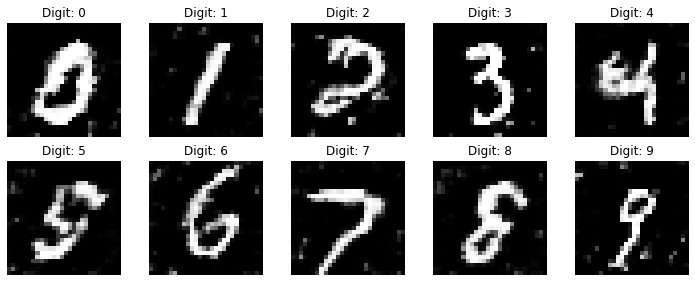

10000 [D loss: 0.018592, acc.: 98.44%] [G loss: 7.369728]


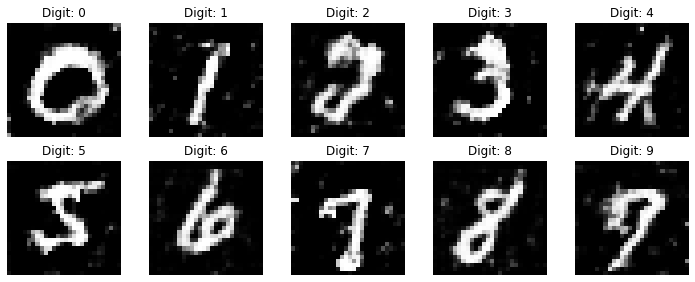

11000 [D loss: 0.012958, acc.: 100.00%] [G loss: 12.328837]


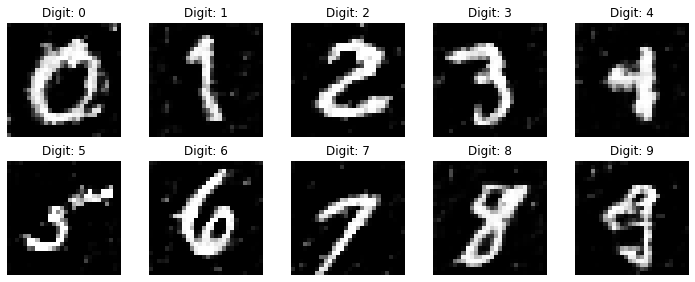

12000 [D loss: 0.000068, acc.: 100.00%] [G loss: 8.850399]


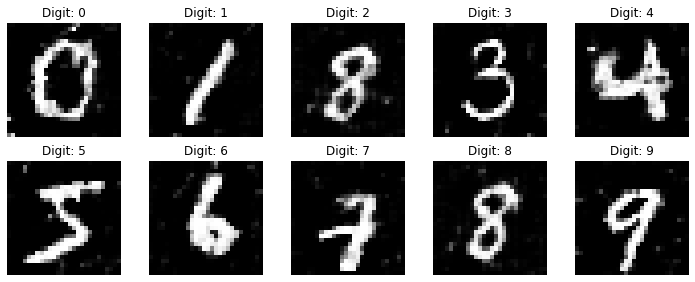

13000 [D loss: 0.000226, acc.: 100.00%] [G loss: 14.972865]


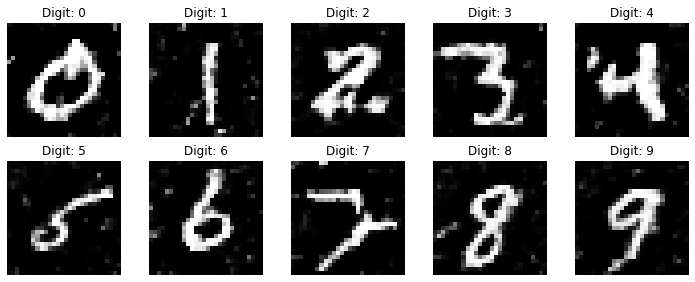

14000 [D loss: 0.000615, acc.: 100.00%] [G loss: 8.594622]


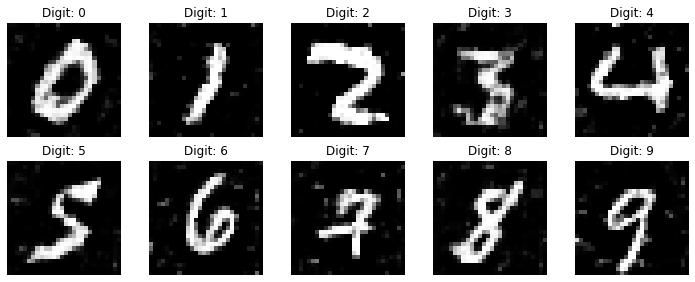

15000 [D loss: 0.000445, acc.: 100.00%] [G loss: 8.643554]


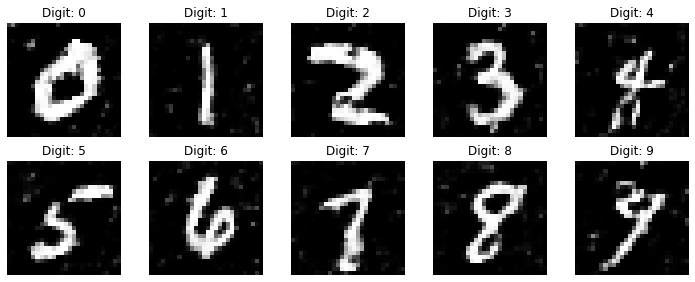

16000 [D loss: 0.000154, acc.: 100.00%] [G loss: 8.861985]


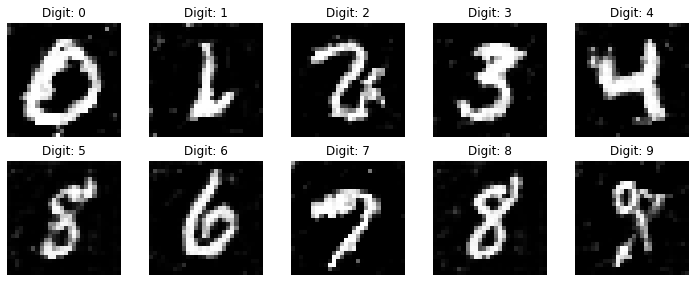

17000 [D loss: 0.000288, acc.: 100.00%] [G loss: 10.820441]


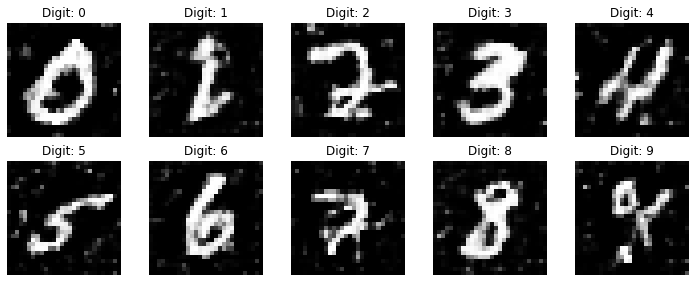

18000 [D loss: 0.000885, acc.: 100.00%] [G loss: 8.928105]


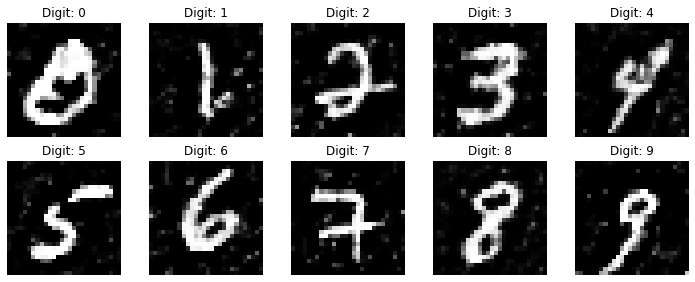

19000 [D loss: 0.000723, acc.: 100.00%] [G loss: 11.666523]


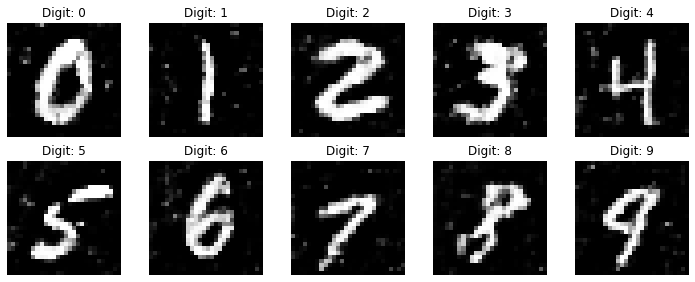

20000 [D loss: 0.000020, acc.: 100.00%] [G loss: 13.585004]


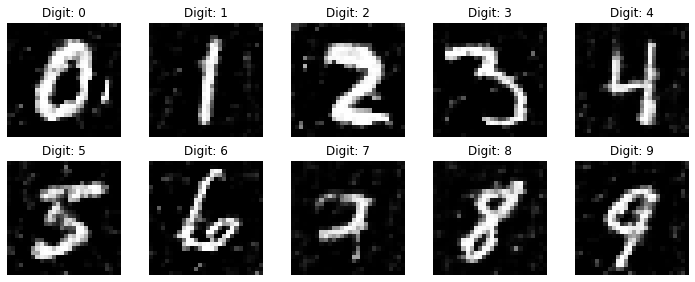

21000 [D loss: 0.002237, acc.: 100.00%] [G loss: 17.744595]


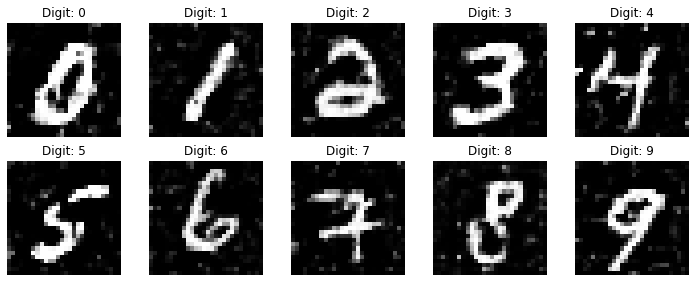

22000 [D loss: 0.014957, acc.: 100.00%] [G loss: 8.576672]


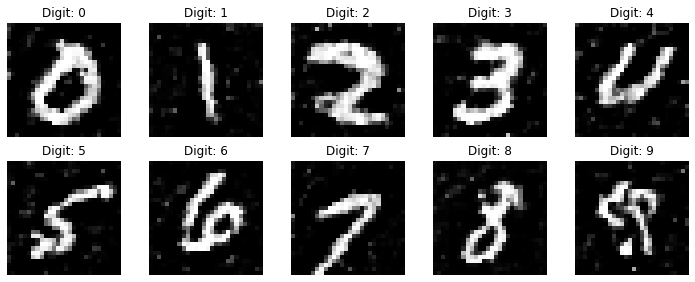

23000 [D loss: 0.000107, acc.: 100.00%] [G loss: 9.637060]


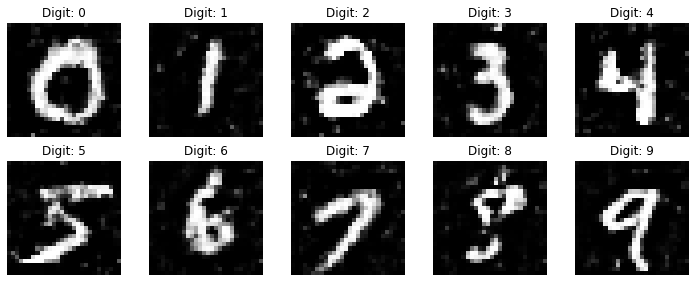

24000 [D loss: 0.001181, acc.: 100.00%] [G loss: 9.599667]


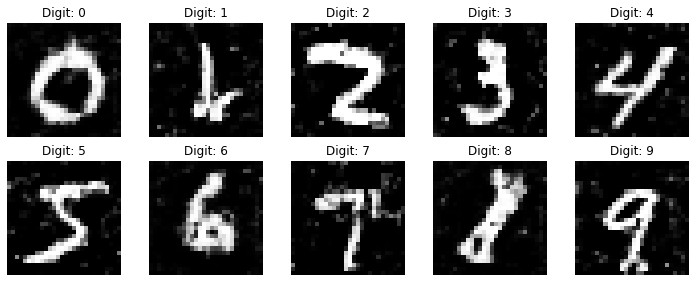

25000 [D loss: 0.000283, acc.: 100.00%] [G loss: 13.897772]


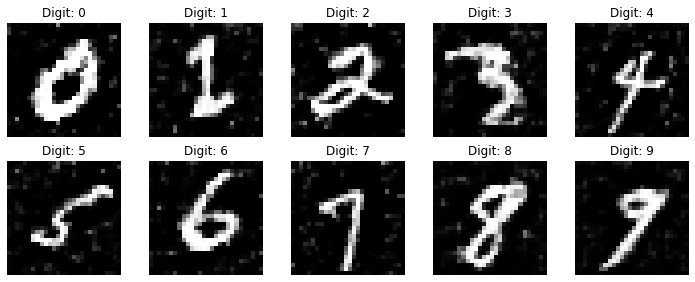

In [4]:
train_hist, accuracies = cgan.train(25000, 32, 1000)

In [259]:
# dataset = Dataset()
# x, y = dataset.test_set()
# y = to_categorical(y, num_classes=10)
# gen = load_model("models/cgan_generator_weight_1000.h5")
# #_, accuracy = discriminator.evaluate([x, y],0)
# # print("Test Accuracy: %.2f%%" % (100 * accuracy))

In [243]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]
 
# create and save a plot of generated images
def save_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()
 


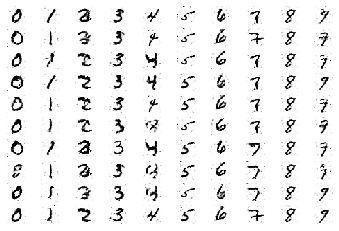

In [257]:
# load model
model = load_model("models/cgan_generator_weight_15000.h5")
# generate images
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = asarray([x for _ in range(10) for x in range(10)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)
